## 붗꽃 데이터 예제를 이용한 K-평균 군집화

In [1]:
# 데이터 가져오기
import pandas as pd
iris = pd.read_csv('./Data/iris.csv')

In [4]:
# 데이터 shape 확인하기
iris.shape

(150, 5)

In [5]:
# 데이터 확인하기
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# class : 종속변수
# 독립변수 : 연속형 변수
# 종속변수 : 명목형 변수
# 데이터 프레임을 x_iris와 y_iris로 분할
x_iris = iris.drop('class', axis = 1)
y_iris = iris['class']

In [8]:
# 모델 생성
from sklearn.cluster import KMeans
k_means_fit = KMeans(n_clusters = 3, max_iter = 300, random_state = 42)
k_means_fit.fit(x_iris) # 비지도 학습은 기본적으로 종속변수와 독립변수의 개념이 없다.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [9]:
# confusion matrix
pd.crosstab(y_iris, k_means_fit.labels_, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1,2
Actual,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


In [11]:
# silhouette-score
from sklearn.metrics import silhouette_score
silhouette_score(x_iris, k_means_fit.labels_)

0.5525919445499757

### 실제 적용에 있어서는 부류의 이름이나 개수를 사전에 알 수 있는 방법이 없다.
### 그런 경우는 정확도를 측정할 방법이 없다.

In [12]:
# 몇 개의 클러스트럴 만들어야 더 좋은 모델인지 확인
for k in range(2,10):
    k_means_fitk = KMeans(n_clusters = k, random_state = 42, max_iter = 300)
    k_means_fitk.fit(x_iris)
    print('For K value', k, ',Silhouette-score: %0.3f' %silhouette_score(x_iris, k_means_fitk.labels_, metric = 'euclidean'))

For K value 2 ,Silhouette-score: 0.681
For K value 3 ,Silhouette-score: 0.553
For K value 4 ,Silhouette-score: 0.498
For K value 5 ,Silhouette-score: 0.489
For K value 6 ,Silhouette-score: 0.368
For K value 7 ,Silhouette-score: 0.358
For K value 8 ,Silhouette-score: 0.359
For K value 9 ,Silhouette-score: 0.342


In [13]:
# 통상적으로 가장 높은 shihouette-score보다 한단계 작은 값의 K를 선택
# 따라서, k = 3일때, 가장 좋은 모델

### 엘보 그래프 그려서 확인

In [15]:
# 평균 클러스터 내 제곱의 합
K = range(1,10)
KM = [KMeans(n_clusters = k).fit(x_iris) for k in K]

In [16]:
# KM 데이터 확인
KM

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

In [19]:
# 중심 좌표 구하기
centroids = [k.cluster_centers_ for k in KM]

In [23]:
# centroids 데이터 확인
centroids # 클러스터 개수 만큼 중심점이 존재한다.
for center in centroids:
    print(len(center))
    print(center)

1
[[5.84333333 3.054      3.75866667 1.19866667]]
2
[[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
3
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
4
[[6.2525     2.855      4.815      1.625     ]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]
5
[[7.475      3.125      6.3        2.05      ]
 [5.006      3.418      1.464      0.244     ]
 [5.508      2.6        3.908      1.204     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]
6
[[5.37058824 3.8        1.51764706 0.27647059]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [4.81818182 3.22121212 1.43636364 0.22727273]
 [7.475      3.125      6.3        2.05      ]
 [5.508      2.6        3.908      1.204   

In [24]:
# 중심점으로부터 거리 구하기
from scipy.spatial.distance import cdist, pdist
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]

In [26]:
# 데이터 확인
D_k

[array([[2.70409024],
        [2.73009841],
        [2.89325146],
        [2.7653036 ],
        [2.75135797],
        [2.40587559],
        [2.83487284],
        [2.63245842],
        [2.94407382],
        [2.68340033],
        [2.59090152],
        [2.62019796],
        [2.80389681],
        [3.26502231],
        [2.90532339],
        [2.75167295],
        [2.75593372],
        [2.668777  ],
        [2.37123821],
        [2.6491956 ],
        [2.35620542],
        [2.59023242],
        [3.2328889 ],
        [2.3106934 ],
        [2.37912533],
        [2.52414421],
        [2.47560848],
        [2.59069566],
        [2.66350095],
        [2.64304824],
        [2.59765997],
        [2.460834  ],
        [2.79582498],
        [2.82698379],
        [2.68340033],
        [2.87691455],
        [2.71277914],
        [2.68340033],
        [3.02134142],
        [2.60214732],
        [2.78617492],
        [3.0373844 ],
        [3.0243849 ],
        [2.43482457],
        [2.28069522],
        [2

In [28]:
# 클러스터 인덱싱
import numpy as np
cIdx = [np.argmin(D, axis = 1) for D in D_k]

In [29]:
# 클러스터 인덱스 확인
cIdx

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [30]:
# 중심점들로 부터 최소거리 구하기
dist = [np.min(D, axis = 1) for D in D_k]

In [31]:
# dist 확인
dist

[array([2.70409024, 2.73009841, 2.89325146, 2.7653036 , 2.75135797,
        2.40587559, 2.83487284, 2.63245842, 2.94407382, 2.68340033,
        2.59090152, 2.62019796, 2.80389681, 3.26502231, 2.90532339,
        2.75167295, 2.75593372, 2.668777  , 2.37123821, 2.6491956 ,
        2.35620542, 2.59023242, 3.2328889 , 2.3106934 , 2.37912533,
        2.52414421, 2.47560848, 2.59069566, 2.66350095, 2.64304824,
        2.59765997, 2.460834  , 2.79582498, 2.82698379, 2.68340033,
        2.87691455, 2.71277914, 2.68340033, 3.02134142, 2.60214732,
        2.78617492, 3.0373844 , 3.0243849 , 2.43482457, 2.28069522,
        2.731734  , 2.60119921, 2.85093622, 2.60987305, 2.70783505,
        1.51189859, 0.98568284, 1.58496183, 0.86885212, 1.13770412,
        0.80305915, 1.14727387, 1.25197338, 1.14646006, 0.77440558,
        1.38870587, 0.54009629, 0.92280587, 1.00808598, 0.34405038,
        1.0898795 , 0.83815512, 0.53213783, 1.22348028, 0.62915605,
        1.21264339, 0.44598655, 1.38163092, 1.00

- K-평균 군집화의 비용함수 => 유클리디언 거리로 결정
<h3>$ J = \sum_{k = 1}^{K}\sum_{i\in C_{k}}^{}||x_{i} - u_{k}||^2$</h3>

In [33]:
# 평균최소거리 합 구하기
avgWithinSS = [sum(d)/x_iris.shape[0] for d in dist]

In [34]:
# 클러스터 내 제곱의 합계 총합
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x_iris)**2/x_iris.shape[0])
bss = tss-wcss

In [35]:
pdist(x_iris)

array([0.53851648, 0.50990195, 0.64807407, ..., 0.6164414 , 0.64031242,
       0.76811457])

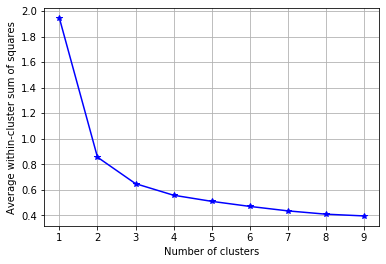

In [46]:
# 엘보 곡선 - 클러스터 내 제곱의 합계 평균
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.show()

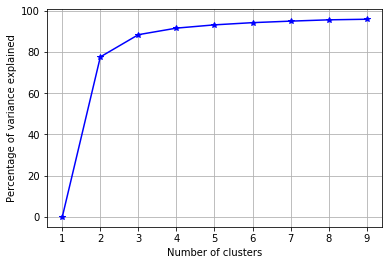

In [48]:
# 엘보 곡선 - 해석된 분산 퍼센티지
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss * 100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.show()